# Differentiation Matrices

In [1]:
%load_ext tikzmagic

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

$\newcommand{\bkt}[1]{\left(#1\right)}$
$\newcommand{\abs}[1]{\left\lvert#1\right\rvert}$
   Our starting point is a basic question. Given a set of grid points $\left\{x_j\right\}$ and corresponding function values $\left\{u\bkt{x_j} \right\}$, how can we use this data to approximate the derivative of $u$? Probably the method that immediately springs to mind is some kind of finite difference formula. It is through finite differences that we shall motivate spectral methods.
   
   To be specific, consider a uniform grid $\left\{x_1,x_2,\ldots,x_N \right\}$, with $x_{j+1}-x_j = h$ for each $j \in \left\{1,2,\ldots,N-1 \right\}$, and a set of corresponding data values $\left\{u_1,u_2,\ldots,u_N \right\}$.

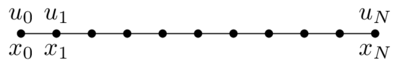

In [3]:
%%tikz --scale=0.5
\draw (0,0) -- (10,0);
\foreach \i in {0,1,...,10}{
    \draw [fill=black] (\i,0) circle (0.1);
}
\node at (0,-0.5) {$x_0$};
\node at (1,-0.5) {$x_1$};
\node at (10,-0.5) {$x_{N}$};
\node at (0,0.5) {$u_0$};
\node at (1,0.5) {$u_1$};
\node at (10,0.5) {$u_{N}$};

Let $w_j$ denote the approximation to $u'\bkt{x_j}$, the derivative of $u$ at $x_j$. The standard second-order finite difference approximation is

\begin{align}
w_j = \dfrac{u_{j+1}-u_{j-1}}{2h}
\label{eqn_central_difference}
\end{align}

which can be derived by considering the Taylor expansions of $u\bkt{x_{j+1}}$ and $u\bkt{x_{j-1}}$. For simplicity, let us assume that the problem is periodic and take $u_0=u_N$ and $u_1=u_{N+1}$. Then we can represent the discrete differentiation process as a matrix-vector multiplication,

\begin{align}
\begin{bmatrix}
w_1\\
w_2\\
w_3\\
\vdots\\
w_{N-2}\\
w_{N-1}\\
w_N
\end{bmatrix}
=\dfrac1h
\begin{bmatrix}
0 & 1/2 & 0 & \cdots & 0 & 0 & -1/2\\
-1/2 & 0 & 1/2 & \cdots & 0 & 0 & 0\\
0 & -1/2 & 0 & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \cdots & 0 & 1/2 & 0\\
0 & 0 & 0 & \cdots & -1/2 & 0 & 1/2\\
1/2 & 0 & 0 & \cdots & 0 & -1/2 & 0\\
\end{bmatrix}
\begin{bmatrix}
u_1\\
u_2\\
u_3\\
\vdots\\
u_{N-2}\\
u_{N-1}\\
u_N
\end{bmatrix}
\label{eqn_central_difference_matrix}
\end{align}

Most of the entries are zero with the super-diagonal being $1/2$ and sub-diagonal being $-1/2$. Since, we have assumed that the function is periodic, we also have $1/2$ appearing on the left bottom of the matrix and $-1/2$ appearing on the right top of the matrix.

Observe that the matrix is a Topelitz matrix, i.e., the entries along each diagonal are the same, i.e., $A_{i,j}$ only depends on $i-j$. In fact, it is also ***circulant***, meaning $A_{i,j}$ only depends on $\bkt{i-j}\bmod N$. The diagonals "wrap around" the matrix.

   An alternative way to derive \ref{eqn_central_difference} and \ref{eqn_central_difference_matrix} is by the following process of local interpolation and differentiation.

   For $j=1,2,\ldots,N$
    <li>Let $p_j$ be the unique polynomial of degree $\leq 2$ with $p_j\bkt{x_{j-1}} = u_{j-1}$, $p_j\bkt{x_j} = u_j$ and $p_j\bkt{x_{j+1}} = u_{j+1}$</li>
    <li>Set $w_j = p_j'\bkt{x_j}$

It is easily seen that, for a fixed $j$, the interpolanat $p_j$ is given by
$$p_j(x) = u_{j-1}a_{-1}(x) + u_{j}a_{0}(x) + u_{j+1}a_{1}(x)$$
where
$$a_{-1}(x) = \dfrac{\bkt{x-x_j}\bkt{x-x_{j+1}}}{2h^2}$$
$$a_{0}(x) = -\dfrac{\bkt{x-x_{j-1}}\bkt{x-x_{j+1}}}{h^2}$$
$$a_{1}(x) = \dfrac{\bkt{x-x_{j-1}}\bkt{x-x_{j}}}{2h^2}$$
Differentiating $p_j(x)$ and evaluating at $x=x_j$ gives us \ref{eqn_central_difference}

The above derivation by local interpolation makes it clear how we can generalize to higher orders. Here is the fourth order analogue:

For $j=1,2,\ldots,N$
<li>Let $p_j$ be the unique polynomial of degree $\leq 4$ with $p_j\bkt{x_{j\pm2}} = u_{j \pm 2}$, $p_j\bkt{x_{j\pm1}} = u_{j \pm 1}$ and $p_j\bkt{x_{j}} = u_{j}$.</li>
<li>Set $w_j = p_j'\bkt{x_j}$</li>

Again assuming periodicity of the data, it can be shown that this prescription amounts to the matrix-vector product

\begin{align}
\begin{bmatrix}
w_1\\
w_2\\
w_3\\
\vdots\\
w_{N-2}\\
w_{N-1}\\
w_N
\end{bmatrix}
=\dfrac1h
\begin{bmatrix}
0 & 2/3 & -1/12 & \cdots & 0 & 1/12 & -2/3\\
-2/3 & 0 & 2/3 & \cdots & 0 & 0 & 1/12\\
1/12 & -2/3 & 0 & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \cdots & 0 & 2/3 & -1/12\\
-1/12 & 0 & 0 & \cdots & -2/3 & 0 & 2/3\\
2/3 & -1/12 & 0 & \cdots & 1/12 & -2/3 & 0\\
\end{bmatrix}
\begin{bmatrix}
u_1\\
u_2\\
u_3\\
\vdots\\
u_{N-2}\\
u_{N-1}\\
u_N
\end{bmatrix}
\label{eqn_fourth_order_central_difference_matrix}
\end{align}

This time we have a pentadiagonal instead of a tridiagonal circulant matrix.

The matrices in \ref{eqn_central_difference_matrix} and \ref{eqn_fourth_order_central_difference_matrix} are examples of ***differentiation matrices***. They have order of accuracy two and four, respectively. That is, for data $u_j$ obtained by sampling a sufficiently smooth function $u$, the corresponding discrete approximations to $u'\bkt{x_j}$ will converge at the rates $\mathcal{O}\bkt{h^2}$ and $\mathcal{O}\bkt{h^4}$ as $h \to 0$, respectively. One can verify this by considering the Taylor series.

Our first Python program, Program 1, illustrates the behavior of \ref{eqn_central_difference_matrix} and our second program, Program 2, illustrates the behavior of \ref{eqn_fourth_order_central_difference_matrix}. We consider the function $u(x) = e^{\sin(x)}$ to give a periodic data on the domain $[-\pi,\pi]$, i.e., $x_j = -\pi + \dfrac{2\pi j}{N}$.

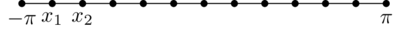

In [4]:
%%tikz --scale=0.5
\draw (0,0) -- (12,0);
\foreach \i in {0,1,...,12}{
    \draw [fill=black] (\i,0) circle (0.1);
}
\node at (0,-0.5) {$-\pi$};
\node at (1,-0.5) {$x_1$};
\node at (2,-0.5) {$x_2$};
\node at (12,-0.5) {$\pi$};

   The program compares the finite difference approximation $w_j$ with the exact derivative, $e^{\sin\bkt{x_j}} \cos\bkt{x_j}$, for various values of $N$. Because it makes use of sparse matrix arithemtics, this code runs fast, even though it manipulates matrices of dimensions as large as $4096$. The results are presented in Output $1$ and Output $2$. The corresponding orders of accuracy are apparent. These will be our first and last example that does not illustrate a spectral method!

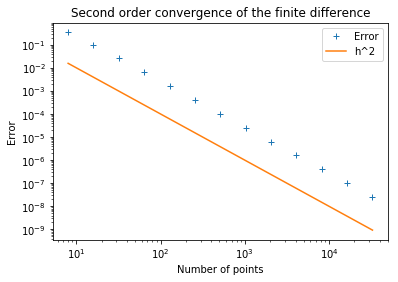

In [13]:
# Program 1
# Accuracy of second order central difference for various N, set up grid in $[-\pi,\pi]$ and function u(x):
import scipy as sp
from scipy import sparse
from scipy.linalg import circulant
n      = 2**sp.arange(3,16);
error = sp.zeros(sp.size(n));
for k in range(0,sp.size(n)):
    N           = n[k];
    h           = 2*sp.pi/N;
    x           = -sp.pi+sp.arange(1,N+1)*h;
    u           = sp.exp(sp.sin(x));
    uprime      = sp.cos(x)*u;
    v           = sp.zeros(N);
    v[1]        = -1/2;
    v[-1]       = 1/2;
    D           = sparse.csr_matrix(circulant(v));
    du          = D.dot(u)/h;
    error[k]  = sp.amax(du-uprime);

import matplotlib.pyplot as plt
plt.loglog(n,error,'+', label='Error')
plt.loglog(n,1/n**2,'-', label='h^2')
plt.xlabel('Number of points');
plt.ylabel('Error');
plt.legend();
plt.title('Second order convergence of the finite difference');
plt.show()

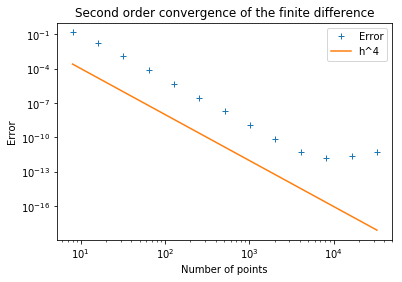

In [12]:
# Program 2
# Accuracy of fourth order central difference for various N, set up grid in $[-\pi,\pi]$ and function u(x):
import scipy as sp
from scipy import sparse
from scipy.linalg import circulant
n      = 2**sp.arange(3,16);
error = sp.zeros(sp.size(n));
for k in range(0,sp.size(n)):
    N           = n[k];
    h           = 2*sp.pi/N;
    x           = -sp.pi+sp.arange(1,N+1)*h;
    u           = sp.exp(sp.sin(x));
    uprime   = sp.cos(x)*u;
    v           = sp.zeros(N);
    v[1]       = -8;
    v[-1]      = 8;
    v[2]       = 1;
    v[-2]      = -1;
    D           = sparse.csr_matrix(circulant(v));
    du          = D.dot(u)/12/h;
    error[k]  = sp.amax(du-uprime);

import matplotlib.pyplot as plt
plt.loglog(n,error,'+', label='Error')
plt.loglog(n,1/n**4,'-', label='h^4')
plt.xlabel('Number of points');
plt.ylabel('Error');
plt.legend();
plt.title('Second order convergence of the finite difference');
plt.show()

We have looked at second and fourth order finite differences, and it is clear that consideration of sixth, eigth and higher order schemes will again lead to circulant matrices of increasing bandwidth. The idea behind spectral methods is to take this process to the limit, at least in principle, and work with a differentiation formula of infinite order and infinite bandwidth, i.e., a dense matrix. In the next chapter, we shall show that in this limit, for an infinite equispaced grid, one obtains the following infinite differentiation matrix whose entries are given by
    \begin{align}
        D_{ij} & = \begin{cases}
        \dfrac1h\dfrac{{(-1)}^{i-j}}{i-j} & \text{if }i \neq j\\
        0 & \text{if }i=j
        \end{cases}
    \end{align}

This is a skew symmetric (i.e., $D^T = D$) double infinite Toeplitz matrix, also known as a ***Laurent operator***. All its entries are non-zero except on the main diagonal.

   Of course, in practice one does not work with an infinite matrix. For a finite grid, here is the design principle for spectral collocation methods:

<li> Let $p$ be a single function (independent of $j$) such that $p(x_j) = u_j$ for all $j$. </li>
<li> Set $w_j = p'(x_j)$ </li>

We are free to choose $p$ to fite the problem at hand. For a periodic domain, the natural choice is a trigonometric polynomial on an equispaced grid, and the resulting "Fourier" methods will be our concern through Chapter $4$ and intermittently in later chapters. For non-periodic domains, algebraic polynomials on irregular grids are the right choice, and we will describe the "Chebyshev" methods of this type beginning in Chapters 5 and 6.

For finite $N$, taking $N$ even for simplicity, here is the $N \times N$ dense matrix, we will derive in Chapter $3$ for a periodic, regular grid:

\begin{align}
D_N(i,j) & = \begin{cases}
\bkt{-1}^{i-j} \dfrac12 \cot \bkt{\dfrac{(i-j)h}2} & \text{if } i \neq j\\
0 & \text{if }i=j
\end{cases}
\end{align}

A little manipulation of the cotangent function function appearing above reveals that this matrix is indeed circulant as well as Toeplitz.

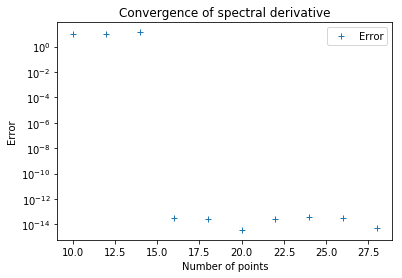

In [8]:
# Program 3
# Accuracy of the periodic spectral method for various N, set up grid in $[-\pi,\pi]$ and function u(x):
import scipy as sp
from scipy import linalg
n      = sp.arange(10,30,2);
error = sp.zeros(sp.size(n));
for k in range(0,sp.size(n)):
    N           = n[k];
    h           = 2*sp.pi/N;
    x           = -sp.pi+sp.arange(1,N+1)*h;
#     u           = sp.exp(sp.sin(x));
    u        = sp.cos(8*x);
    uprime      = -8*sp.sin(8*x);
    vec           = sp.zeros(N);
    vec[1:N]   = (-1)**sp.arange(1,N)/sp.tan(sp.arange(1,N)*h/2);
    D           = sp.linalg.circulant(vec);
    du          = 0.5*D.dot(u);
    error[k]    = sp.amax(du-uprime);

import matplotlib.pyplot as plt
plt.semilogy(n,error,'+', label='Error')
plt.xlabel('Number of points');
plt.ylabel('Error');
plt.legend();
plt.title('Convergence of spectral derivative');
plt.show();

Note the "spectral accuracy" of the spectral method above, until the rounding errors take over around $10^{-14}$. Now the matrices are dense, but the values of $N$ are much smaller than the previous program. We hit machine precision accuracy with just around $30$ points.

The program above is almost the same as the previous two except on one line where the differentiation matrix definition has been changed. What a difference it makes in the results! The errors in the ouput decrease extremely rapidly until such high precision is achieved that the rounding errors on the computer prevent any further improvement (all calculations are done in standard IEEE double precision arithmetic with $\epsilon_{\text{machine}} = 2^{-53} \approx 1.11 \times 10^{-16}$. This means that each addition, multiplication, division and subtraction produces the exactly correct result times some factor $1+\delta$ with $\abs{\delta} \leq \epsilon_{\text{machine}}$.

This remarkable behavior is called ***spectral accuracy***. We wil give this phrase some precision in Chapter $4$, but for the moment, the point to note is how different it is from convergence rates for finite difference and finite element methods. As $N$ increases, the error in a finite difference or finite element schemes typically decreases like $\mathcal{O}\bkt{N^{-m}}$ for some constant $m$ that depends on the order of approximation and smoothness of the solution. For a spectral method, convergence at the rate $\mathcal{O}\bkt{N^{-m}}$ for ***every*** $m$ is achieved, provided the solution is infinitely differentiable, and even fast convergence at a rate $\mathcal{O}\bkt{c^N}$, where $0 < c < 1$, is achieved if the solution is suitably analytic.

The matrices we have described have been circulant. The action of a circulant matrix is a convolution, and as we shall see in Chapter $3$, convolutions can be computed using a discrete Fourier Transform. Histrocially, it was the discovery of the Fast Fourier Transform (FFT) for such problems in $1965$ that led to the surge of interest in spectral methods in the $1970$'s. We shall in Chapter $8$ that the FFT is applicable not only to trigonometric polynomials on equispaced grids, but also to algebraic polynomials on Chebyshev grids. Yet spectral methods implemented without FFT are powerful, too, and in many applications, it is quite satisfactory to work with explicit matrices. Most problems in this book are solved via matrices.

## Summary of this chapter:

The fundamental principle of spectral collocation methods, is given discrete data on a grid, interpolate the data globally, then evaluate the derivative of the interpolant on the grid. For periodic problems, we normally use trigonometric interpolants in equispaced points, and for non-periodic problems, we normally use polynomial interpolants in unevenly spaced points.